# Working with Data
___________________________________

Carolina Tovar Castiblanco

In [1]:
import os, sys
import pandas as pd
import numpy as np
import seaborn as sns
import pandas_gbq
import matplotlib.pyplot as plt

from pathlib import Path
current_dir = Path('.').resolve()
project_dir = Path(current_dir).parent

In [2]:
query = """

   SELECT 
*
 FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips` LIMIT 1000
"""
df = pd.read_gbq(query)
df.head()

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,59f84d09b07552b9cdd61c841b8f4203be536a38,6fd459ffaac2670ce6a096faf040b54b265ba8e619befa...,2016-10-22 11:15:00+00:00,2016-10-22 11:30:00+00:00,1080,3.7,<NA>,<NA>,<NA>,<NA>,...,0.0,17.25,Credit Card,24 Seven Taxi,NaN,NaN,None,NaN,NaN,None
1,595b78b8256da9ee8556cdeb36aee0b7bc6cbef4,6fd459ffaac2670ce6a096faf040b54b265ba8e619befa...,2016-10-22 11:45:00+00:00,2016-10-22 11:45:00+00:00,480,1.4,<NA>,<NA>,<NA>,<NA>,...,0.0,7.50,Cash,24 Seven Taxi,NaN,NaN,None,NaN,NaN,None
2,5ca678f3e80fb5cf8f59016404686fd995daaedd,6fd459ffaac2670ce6a096faf040b54b265ba8e619befa...,2016-10-22 12:15:00+00:00,2016-10-22 12:30:00+00:00,1260,3.2,<NA>,<NA>,<NA>,<NA>,...,1.0,14.75,Cash,24 Seven Taxi,NaN,NaN,None,NaN,NaN,None
3,b073a32500edc07a1f9126280e95ffab907feabd,6fd459ffaac2670ce6a096faf040b54b265ba8e619befa...,2016-10-22 12:45:00+00:00,2016-10-22 13:00:00+00:00,840,1.7,<NA>,<NA>,<NA>,<NA>,...,0.0,9.50,Cash,24 Seven Taxi,NaN,NaN,None,NaN,NaN,None
4,398814abbc7b95f88f176eae27fd56dea26b78d0,6fd459ffaac2670ce6a096faf040b54b265ba8e619befa...,2016-10-22 13:45:00+00:00,2016-10-22 14:00:00+00:00,240,0.7,<NA>,<NA>,<NA>,<NA>,...,0.0,7.50,Credit Card,24 Seven Taxi,NaN,NaN,None,NaN,NaN,None


In [3]:
# Get only numeric columns
numerics = ['int16','int32','int64','float16','float32','float64']

num_df = df.select_dtypes(include=numerics)
num_df.head()

,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,1080,3.7,<NA>,<NA>,<NA>,<NA>,13.75,3.0,0.0,0.0,17.25,NaN,NaN,NaN,NaN
1,480,1.4,<NA>,<NA>,<NA>,<NA>,7.50,0.0,0.0,0.0,7.50,NaN,NaN,NaN,NaN
2,1260,3.2,<NA>,<NA>,<NA>,<NA>,13.75,0.0,0.0,1.0,14.75,NaN,NaN,NaN,NaN
3,840,1.7,<NA>,<NA>,<NA>,<NA>,9.50,0.0,0.0,0.0,9.50,NaN,NaN,NaN,NaN
4,240,0.7,<NA>,<NA>,<NA>,<NA>,5.00,2.0,0.0,0.0,7.50,NaN,NaN,NaN,NaN


In [4]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trip_seconds            1000 non-null   Int64  
 1   trip_miles              1000 non-null   float64
 2   pickup_census_tract     0 non-null      Int64  
 3   dropoff_census_tract    0 non-null      Int64  
 4   pickup_community_area   0 non-null      Int64  
 5   dropoff_community_area  0 non-null      Int64  
 6   fare                    1000 non-null   float64
 7   tips                    1000 non-null   float64
 8   tolls                   1000 non-null   float64
 9   extras                  1000 non-null   float64
 10  trip_total              1000 non-null   float64
 11  pickup_latitude         0 non-null      float64
 12  pickup_longitude        0 non-null      float64
 13  dropoff_latitude        0 non-null      float64
 14  dropoff_longitude       0 non-null      f

**When exploring the data, it can be seen that the query is bringing null values in several of the numeric data type columns, probably because of the limit. These columns are checked in BigQuery for non-null fields. The query is modified so that it brings non-null data with the same limit, in order to make the corresponding graphs. It can also be seen that the 'Tolls' column only brought values equal to 0, so field records different from 0 are brought in the query to have a better sample**

In [5]:
query = """

SELECT
  *
FROM
  `bigquery-public-data.chicago_taxi_trips.taxi_trips`
WHERE
  trip_seconds IS NOT NULL
  AND trip_miles IS NOT NULL
  AND pickup_census_tract IS NOT NULL
  AND dropoff_census_tract IS NOT NULL
  AND pickup_community_area IS NOT NULL
  AND dropoff_community_area IS NOT NULL
  AND fare IS NOT NULL
  AND tips IS NOT NULL
  AND tolls <> 0
  AND extras IS NOT NULL
  AND trip_total IS NOT NULL
  AND pickup_latitude IS NOT NULL
  AND pickup_longitude IS NOT NULL
  AND dropoff_latitude IS NOT NULL
  AND dropoff_longitude IS NOT NULL
LIMIT
  1000
"""
df = pd.read_gbq(query)
df.head()

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,5aa0719b25d0961a9f7d4b1cc456210841df5170,3c0161e62a7344b442d21a208d41053ee0bf1470d74cbd...,2018-05-14 12:30:00+00:00,2018-05-14 13:00:00+00:00,2220,25.6,17031320100,17031839100,32,32,...,4.0,81.60,Credit Card,Globe Taxi,41.884987,-87.620993,POINT (-87.6209929134 41.8849871918),41.880994,-87.632746,POINT (-87.6327464887 41.8809944707)
1,07af74f69153b9c60e37b133e5b2a870a71e851f,3c0161e62a7344b442d21a208d41053ee0bf1470d74cbd...,2018-05-14 20:30:00+00:00,2018-05-14 21:00:00+00:00,2100,26.3,17031980000,17031839100,76,32,...,4.0,80.75,Credit Card,Globe Taxi,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.880994,-87.632746,POINT (-87.6327464887 41.8809944707)
2,3f6657e34208036b70e864a09f9b8d548c7cf6e3,8e937c42425bbfba5e3b54fe3fd7ea60cc98d94ad9d837...,2016-06-20 07:45:00+00:00,2016-06-20 08:00:00+00:00,780,0.0,17031081403,17031841900,8,28,...,0.0,1325.09,Cash,Chicago Independents,41.890922,-87.618868,POINT (-87.6188683546 41.8909220259),41.867902,-87.642959,POINT (-87.6429586652 41.8679024175)
3,d7e0b1a02f9dfa0900cebe9363b18be492b0f4ed,8c1af0983bb43246ff0afee514decca8c8a1e5295b7937...,2018-05-16 01:30:00+00:00,2018-05-16 02:15:00+00:00,2580,27.7,17031980000,17031980000,76,76,...,40.0,108.00,Cash,Globe Taxi,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.979071,-87.903040,POINT (-87.9030396611 41.9790708201)
4,cc7e692a85888e76868390753269ef678a3958cd,8c1af0983bb43246ff0afee514decca8c8a1e5295b7937...,2018-05-16 23:15:00+00:00,2018-05-16 23:30:00+00:00,1020,7.8,17031980000,17031980000,76,76,...,5.0,28.90,Cash,Globe Taxi,41.979071,-87.903040,POINT (-87.9030396611 41.9790708201),41.979071,-87.903040,POINT (-87.9030396611 41.9790708201)


## Explore data

In [6]:
# Get only numeric columns
numerics = ['int16','int32','int64','float16','float32','float64']

num_df = df.select_dtypes(include=numerics)
num_df.head()

,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
0,2220,25.6,17031320100,17031839100,32,32,62.00,13.6,1.5,4.0,81.60,41.884987,-87.620993,41.880994,-87.632746
1,2100,26.3,17031980000,17031839100,76,32,64.75,10.0,1.5,4.0,80.75,41.979071,-87.903040,41.880994,-87.632746
2,780,0.0,17031081403,17031841900,8,28,1300.09,0.0,25.0,0.0,1325.09,41.890922,-87.618868,41.867902,-87.642959
3,2580,27.7,17031980000,17031980000,76,76,66.50,0.0,1.5,40.0,108.00,41.979071,-87.903040,41.979071,-87.903040
4,1020,7.8,17031980000,17031980000,76,76,22.00,0.0,1.9,5.0,28.90,41.979071,-87.903040,41.979071,-87.903040


In [7]:
num_df.describe()

,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,fare,tips,tolls,extras,trip_total,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
count,1000.000000,1000.000000,1.000000e+03,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2408.582000,16.016450,1.703164e+10,1.703150e+10,44.640000,33.854000,1349.117790,2.836340,23.379180,3.580150,1378.951230,41.920012,-87.752070,41.898827,-87.695264
std,7151.268732,86.284785,3.973174e+05,3.856278e+05,28.869254,25.175792,2484.513073,5.739003,40.102403,14.324132,2495.433518,0.059533,0.127306,0.054674,0.105796
min,0.000000,0.000000,1.703102e+10,1.703102e+10,1.000000,1.000000,0.000000,0.000000,0.010000,0.000000,0.010000,41.785999,-87.903040,41.702777,-87.903040
25%,360.000000,0.000000,1.703110e+10,1.703108e+10,8.000000,8.000000,19.812500,0.000000,2.000000,0.000000,50.320000,41.884987,-87.903040,41.879255,-87.750934
50%,1200.000000,0.200000,1.703184e+10,1.703132e+10,33.000000,32.000000,61.850000,0.000000,4.000000,0.100000,74.860000,41.907506,-87.681356,41.892042,-87.632853
75%,2400.000000,17.900000,1.703198e+10,1.703198e+10,76.000000,56.000000,1292.537500,3.962500,50.000000,4.000000,1315.522500,41.979071,-87.631864,41.929265,-87.622173
max,84540.000000,1567.200000,1.703198e+10,1.703198e+10,77.000000,77.000000,9600.580000,77.000000,999.990000,300.000000,9675.590000,42.001698,-87.587479,42.015697,-87.583144


In [8]:
num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trip_seconds            1000 non-null   Int64  
 1   trip_miles              1000 non-null   float64
 2   pickup_census_tract     1000 non-null   Int64  
 3   dropoff_census_tract    1000 non-null   Int64  
 4   pickup_community_area   1000 non-null   Int64  
 5   dropoff_community_area  1000 non-null   Int64  
 6   fare                    1000 non-null   float64
 7   tips                    1000 non-null   float64
 8   tolls                   1000 non-null   float64
 9   extras                  1000 non-null   float64
 10  trip_total              1000 non-null   float64
 11  pickup_latitude         1000 non-null   float64
 12  pickup_longitude        1000 non-null   float64
 13  dropoff_latitude        1000 non-null   float64
 14  dropoff_longitude       1000 non-null   f

## 1. One-dimensional data. Similary distributions with the rest of the numerical variables

- Histograma

 - Box Plots

### trip_seconds

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


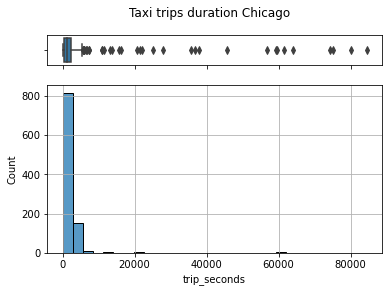

In [9]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(num_df["trip_seconds"], ax=ax_box)
sns.histplot(data=num_df, x="trip_seconds", bins=30, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

plt.suptitle('Taxi trips duration Chicago')
ax_hist.grid()


plot_path = os.path.join(project_dir, 'reports', 'plots', 'taxi-trip-duration-chicago')
f.savefig(plot_path)


### trip_miles

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


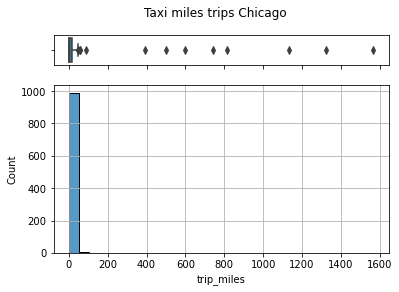

In [10]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(num_df["trip_miles"], ax=ax_box)
sns.histplot(data=num_df, x="trip_miles", bins=30, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

plt.suptitle('Taxi miles trips Chicago')
ax_hist.grid()


plot_path = os.path.join(project_dir, 'reports', 'plots', 'taxi-miles-trips-chicago')
f.savefig(plot_path)


### pickup_census_tract

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


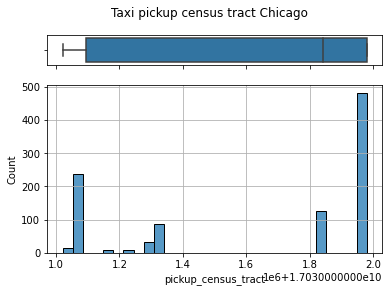

In [11]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(num_df["pickup_census_tract"], ax=ax_box)
sns.histplot(data=num_df, x="pickup_census_tract", bins=30, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

plt.suptitle('Taxi pickup census tract Chicago')
ax_hist.grid()


plot_path = os.path.join(project_dir, 'reports', 'plots', 'pickup-census-tract-chicago')
f.savefig(plot_path)

### dropoff_census_tract

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


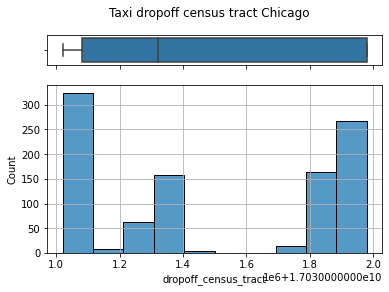

In [12]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(num_df["dropoff_census_tract"], ax=ax_box)
sns.histplot(data=num_df, x="dropoff_census_tract", bins=10, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

plt.suptitle('Taxi dropoff census tract Chicago')
ax_hist.grid()


plot_path = os.path.join(project_dir, 'reports', 'plots', 'dropoff-census-tract-chicago')
f.savefig(plot_path)

### pickup_community_area

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


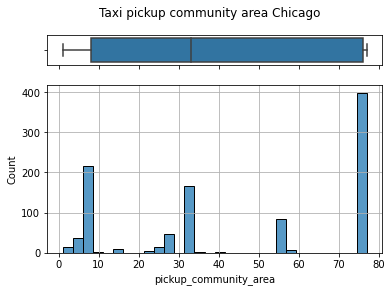

In [13]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(num_df["pickup_community_area"], ax=ax_box)
sns.histplot(data=num_df, x="pickup_community_area", bins=30, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

plt.suptitle('Taxi pickup community area Chicago')
ax_hist.grid()


plot_path = os.path.join(project_dir, 'reports', 'plots', 'taxi-pickup-community-area-chicago')
f.savefig(plot_path)

### dropoff_community_area

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


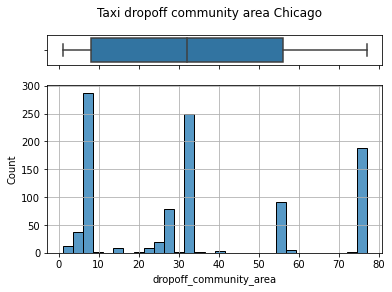

In [14]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(num_df["dropoff_community_area"], ax=ax_box)
sns.histplot(data=num_df, x="dropoff_community_area", bins=30, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

plt.suptitle('Taxi dropoff community area Chicago')
ax_hist.grid()


plot_path = os.path.join(project_dir, 'reports', 'plots', 'taxi-dropoff-community-area-chicago')
f.savefig(plot_path)

### fare

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


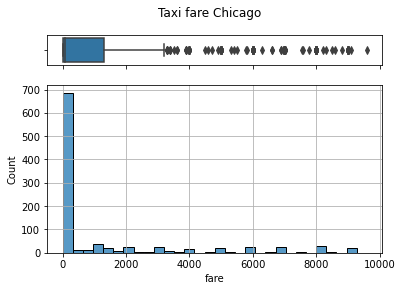

In [15]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(num_df["fare"], ax=ax_box)
sns.histplot(data=num_df, x="fare", bins=30, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

plt.suptitle('Taxi fare Chicago')
ax_hist.grid()


plot_path = os.path.join(project_dir, 'reports', 'plots', 'taxi-fare-chicago')
f.savefig(plot_path)

### tips

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


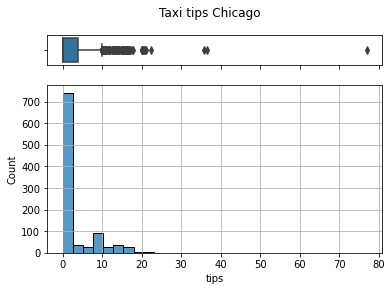

In [16]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(num_df["tips"], ax=ax_box)
sns.histplot(data=num_df, x="tips", bins=30, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

plt.suptitle('Taxi tips Chicago')
ax_hist.grid()


plot_path = os.path.join(project_dir, 'reports', 'plots', 'taxi-tips-chicago')
f.savefig(plot_path)

### tolls

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


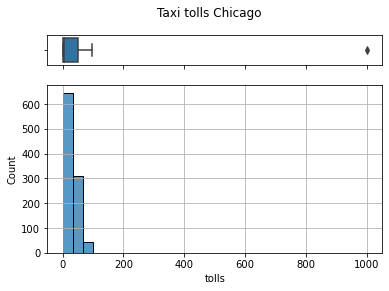

In [17]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(num_df["tolls"], ax=ax_box)
sns.histplot(data=num_df, x="tolls", bins=30, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

plt.suptitle('Taxi tolls Chicago')
ax_hist.grid()


plot_path = os.path.join(project_dir, 'reports', 'plots', 'taxi-tolls-chicago')
f.savefig(plot_path)

### extras

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


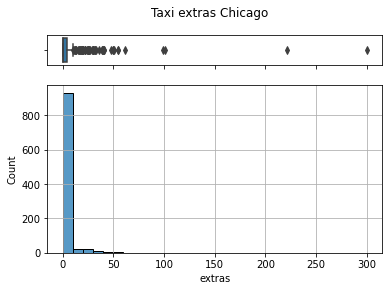

In [18]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(num_df["extras"], ax=ax_box)
sns.histplot(data=num_df, x="extras", bins=30, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

plt.suptitle('Taxi extras Chicago')
ax_hist.grid()


plot_path = os.path.join(project_dir, 'reports', 'plots', 'taxi-extras-chicago')
f.savefig(plot_path)

### trip_total

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


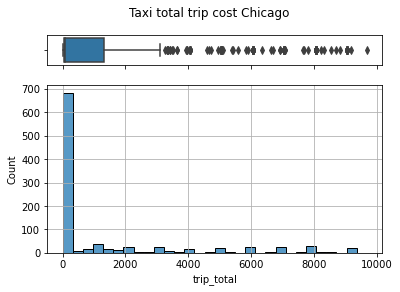

In [19]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(num_df["trip_total"], ax=ax_box)
sns.histplot(data=num_df, x="trip_total", bins=30, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

plt.suptitle('Taxi total trip cost Chicago')
ax_hist.grid()


plot_path = os.path.join(project_dir, 'reports', 'plots', 'taxi-trip-total-chicago')
f.savefig(plot_path)

### pickup_latitude

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


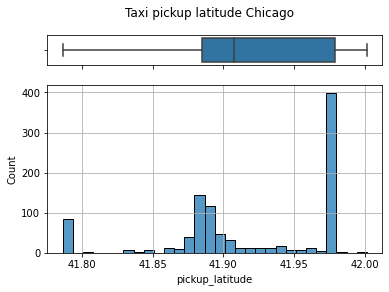

In [20]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(num_df["pickup_latitude"], ax=ax_box)
sns.histplot(data=num_df, x="pickup_latitude", bins=30, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

plt.suptitle('Taxi pickup latitude Chicago')
ax_hist.grid()


plot_path = os.path.join(project_dir, 'reports', 'plots', 'taxi-pickup-latitude-chicago')
f.savefig(plot_path)

### pickup_longitude

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


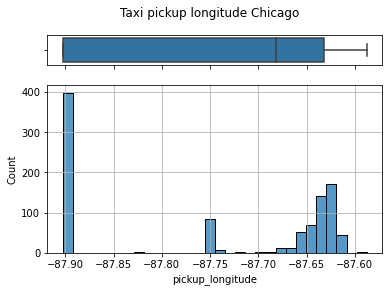

In [21]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(num_df["pickup_longitude"], ax=ax_box)
sns.histplot(data=num_df, x="pickup_longitude", bins=30, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

plt.suptitle('Taxi pickup longitude Chicago')
ax_hist.grid()


plot_path = os.path.join(project_dir, 'reports', 'plots', 'taxi-pickup-longitude-chicago')
f.savefig(plot_path)

### dropoff_latitude

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


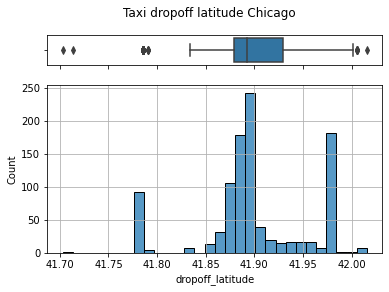

In [22]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(num_df["dropoff_latitude"], ax=ax_box)
sns.histplot(data=num_df, x="dropoff_latitude", bins=30, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

plt.suptitle('Taxi dropoff latitude Chicago')
ax_hist.grid()


plot_path = os.path.join(project_dir, 'reports', 'plots', 'taxi-dropoff-latitude-chicago')
f.savefig(plot_path)

### dropoff_longitude

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


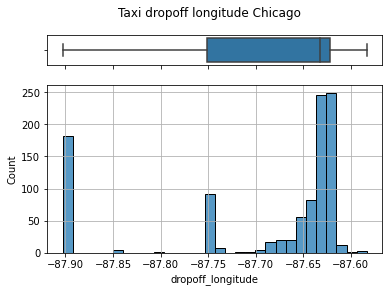

In [23]:
# creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

# assigning a graph to each ax
sns.boxplot(num_df["dropoff_longitude"], ax=ax_box)
sns.histplot(data=num_df, x="dropoff_longitude", bins=30, ax=ax_hist)
 
# Remove x axis name for the boxplot
ax_box.set(xlabel='')

plt.suptitle('Taxi dropoff longitude Chicago')
ax_hist.grid()


plot_path = os.path.join(project_dir, 'reports', 'plots', 'taxi-dropoff-longitude-chicago')
f.savefig(plot_path)

## 2. Study of the relationship between trip_seconds and the rest of the numerical variables

### trip_seconds / trip_miles relationship*

(0.0, 50.0)

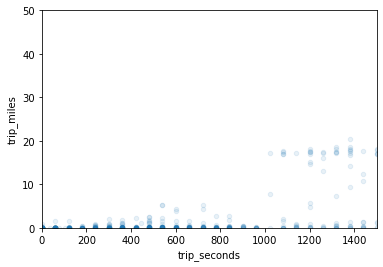

In [24]:
num_df.plot(kind='scatter',x='trip_seconds',y='trip_miles',alpha=0.1)
plt.xlim(0,1500)
plt.ylim(0,50)

In [25]:
x='trip_seconds'
y='trip_miles'
num_df[[x,y]].corr()

,trip_seconds,trip_miles
trip_seconds,1.00,0.41
trip_miles,0.41,1.00


Visualy we can see a linear correlation between X and Y, both the correlation coefficient is showing low values

### trip_seconds / pickup_community_area relationship*

(0.0, 50.0)

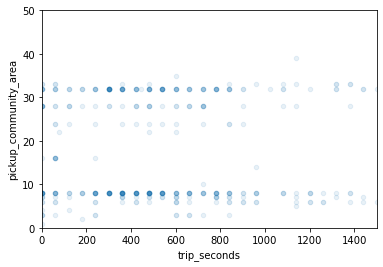

In [26]:
num_df.plot(kind='scatter',x='trip_seconds',y='pickup_community_area',alpha=0.1)
plt.xlim(0,1500)
plt.ylim(0,50)

In [27]:
x='trip_seconds'
y='pickup_community_area'
num_df[[x,y]].corr()

,trip_seconds,pickup_community_area
trip_seconds,1.000000,-0.025775
pickup_community_area,-0.025775,1.000000


### trip_seconds / dropoff_community_area relationship*

(0.0, 50.0)

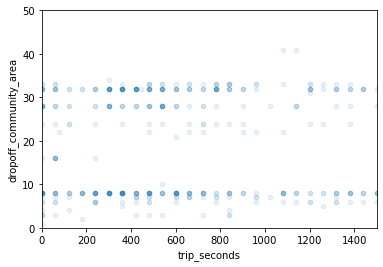

In [28]:
num_df.plot(kind='scatter',x='trip_seconds',y='dropoff_community_area',alpha=0.1)
plt.xlim(0,1500)
plt.ylim(0,50)

In [29]:
x='trip_seconds'
y='dropoff_community_area'
num_df[[x,y]].corr()

,trip_seconds,dropoff_community_area
trip_seconds,1.00000,-0.04088
dropoff_community_area,-0.04088,1.00000


Visually there is no linear correlation between X and Y, the correlation coefficient shows negative values

### trip_seconds / fare relationship

(0.0, 50.0)

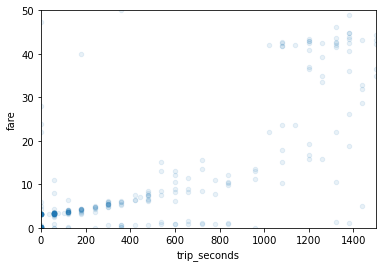

In [30]:
num_df.plot(kind='scatter',x='trip_seconds',y='fare',alpha=0.1)
plt.xlim(0,1500)
plt.ylim(0,50)

In [31]:
x='trip_seconds'
y='fare'
num_df[[x,y]].corr()

,trip_seconds,fare
trip_seconds,1.000000,0.139724
fare,0.139724,1.000000


Visualy we can see a linear correlation between X and Y, both the correlation coefficient is very close to 1

### trip_seconds / tips relationship

(0.0, 50.0)

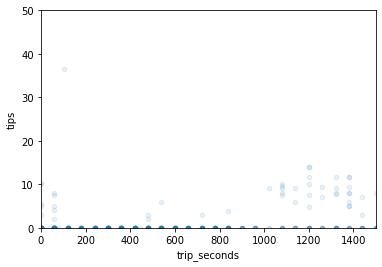

In [32]:
num_df.plot(kind='scatter',x='trip_seconds',y='tips',alpha=0.1)
plt.xlim(0,1500)
plt.ylim(0,50)

In [33]:
x='trip_seconds'
y='tips'
num_df[[x,y]].corr()

,trip_seconds,tips
trip_seconds,1.000000,0.006911
tips,0.006911,1.000000


Visualy we can see a linear correlation between X and Y, both the correlation coefficient is showing low values

### trip_seconds / tolls relationship

(0.0, 50.0)

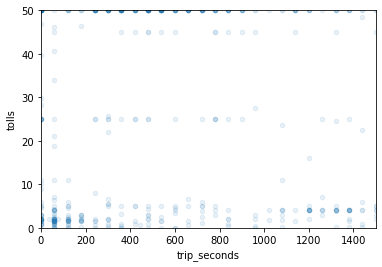

In [34]:
num_df.plot(kind='scatter',x='trip_seconds',y='tolls',alpha=0.1)
plt.xlim(0,1500)
plt.ylim(0,50)

In [35]:
x='trip_seconds'
y='tolls'
num_df[[x,y]].corr()

,trip_seconds,tolls
trip_seconds,1.00000,0.00207
tolls,0.00207,1.00000


Visually there is no linear correlation between X and Y

### trip_seconds / extras relationship

(0.0, 50.0)

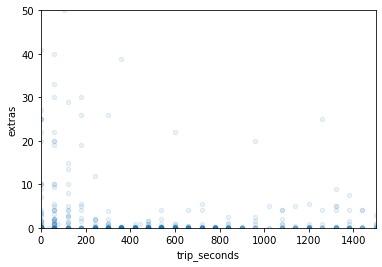

In [36]:
num_df.plot(kind='scatter',x='trip_seconds',y='extras',alpha=0.1)
plt.xlim(0,1500)
plt.ylim(0,50)

In [37]:
x='trip_seconds'
y='extras'
num_df[[x,y]].corr()

,trip_seconds,extras
trip_seconds,1.000000,0.083946
extras,0.083946,1.000000


Visually there is no linear correlation between X and Y

### trip_seconds / trip_total relationship

(0.0, 50.0)

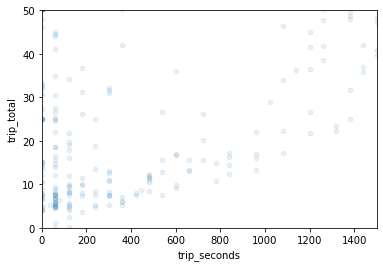

In [38]:
num_df.plot(kind='scatter',x='trip_seconds',y='trip_total',alpha=0.1)
plt.xlim(0,1500)
plt.ylim(0,50)

In [39]:
x='trip_seconds'
y='trip_total'
num_df[[x,y]].corr()

,trip_seconds,trip_total
trip_seconds,1.000000,0.139661
trip_total,0.139661,1.000000


### trip_seconds / pickup_latitude relationship*

(0.0, 50.0)

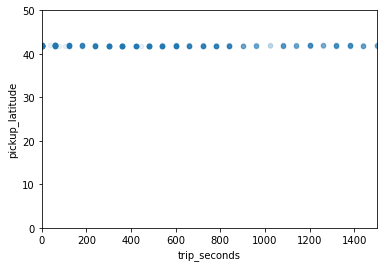

In [40]:
num_df.plot(kind='scatter',x='trip_seconds',y='pickup_latitude',alpha=0.1)
plt.xlim(0,1500)
plt.ylim(0,50)

In [41]:
x='trip_seconds'
y='pickup_latitude'
num_df[[x,y]].corr()

,trip_seconds,pickup_latitude
trip_seconds,1.000000,-0.019923
pickup_latitude,-0.019923,1.000000


The correlation is less than 0, it means that it is negative, that is, that the variables are inversely related.

### trip_seconds / pickup_longitude relationship*

(0.0, 50.0)

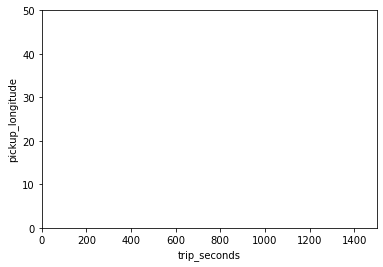

In [42]:
num_df.plot(kind='scatter',x='trip_seconds',y='pickup_longitude',alpha=0.1)
plt.xlim(0,1500)
plt.ylim(0,50)

In [43]:
x='trip_seconds'
y='pickup_longitude'
num_df[[x,y]].corr()

,trip_seconds,pickup_longitude
trip_seconds,1.000000,0.029538
pickup_longitude,0.029538,1.000000


There is no correlation between X and Y, the longitude coordinates in which Chicago is located are negative

### trip_seconds / dropoff_latitude relationship*

(0.0, 50.0)

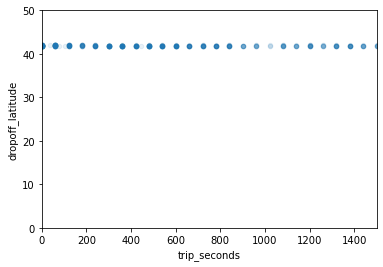

In [44]:
num_df.plot(kind='scatter',x='trip_seconds',y='dropoff_latitude',alpha=0.1)
plt.xlim(0,1500)
plt.ylim(0,50)

In [45]:
x='trip_seconds'
y='dropoff_latitude'
num_df[[x,y]].corr()

,trip_seconds,dropoff_latitude
trip_seconds,1.000000,-0.018043
dropoff_latitude,-0.018043,1.000000


Similar to the "pickup" variable. The correlation is less than 0, it means that it is negative, that is, that the variables are inversely related.

### trip_seconds / dropoff_longitude relationship*

(0.0, 50.0)

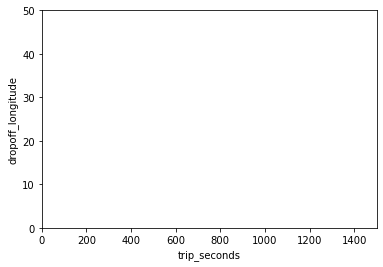

In [46]:
num_df.plot(kind='scatter',x='trip_seconds',y='dropoff_longitude',alpha=0.1)
plt.xlim(0,1500)
plt.ylim(0,50)

In [47]:
x='trip_seconds'
y='dropoff_longitude'
num_df[[x,y]].corr()

,trip_seconds,dropoff_longitude
trip_seconds,1.000000,0.043521
dropoff_longitude,0.043521,1.000000


Similar to the "pickup" variable. There is no correlation between X and Y, the longitude coordinates in which Chicago is located are negative

___________________________________________
****NOTE : It was done with all the numerical variables to confirm the hypothesis that the columns that represent geographic spaces can be graphed but they have a higher correlation to present them in a histogram.***
____________________________________________

## 3. Log Transform
_____________________________
Only numeric variables that do not represent geographic spaces like **census_tract** and **community_area** or coordinates are taken

### Histogram

In [48]:
def log_transform_hist (x, x_name):
        log_x = np.log(x+1)
        f, ax = plt.subplots(1,2, figsize=(15,4))
        f.suptitle(x_name)
        ax[0].hist(x,      bins=30)
        ax[1].hist(log_x, bins=30);

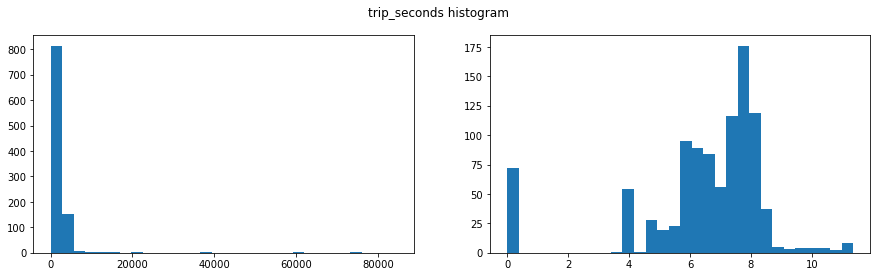

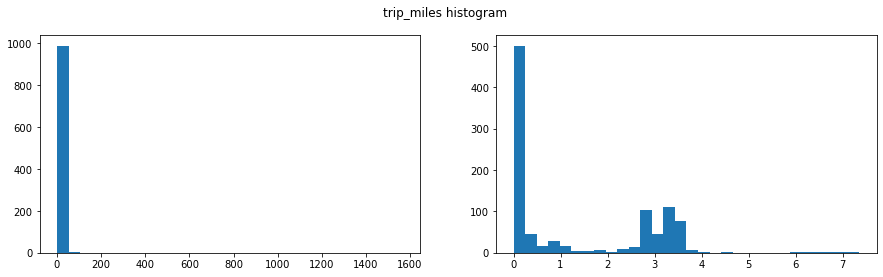

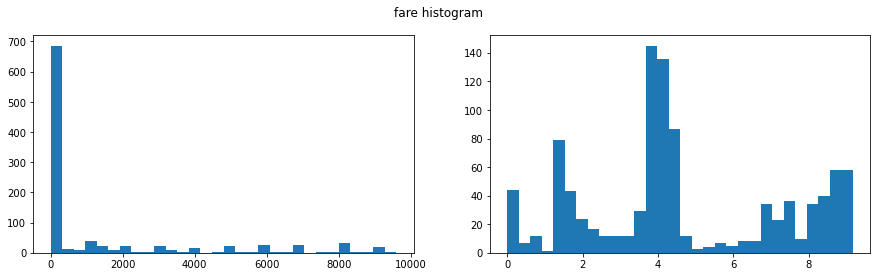

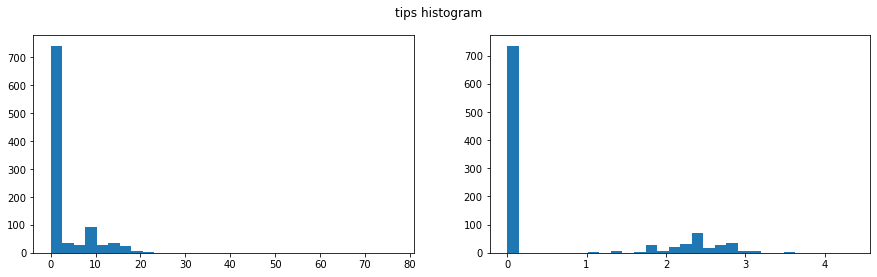

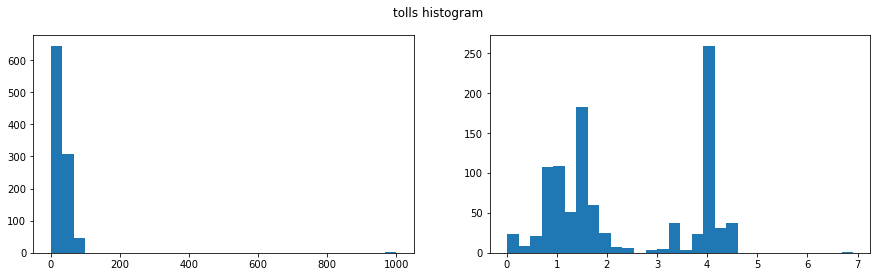

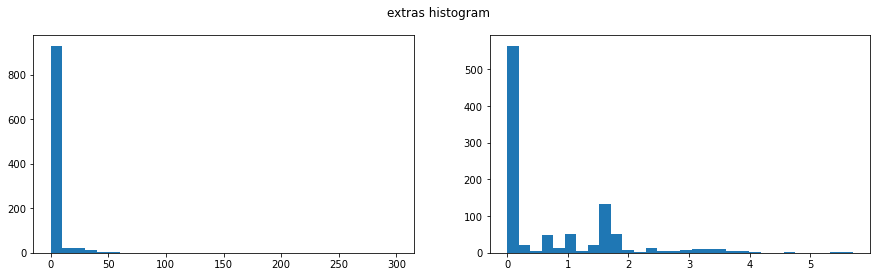

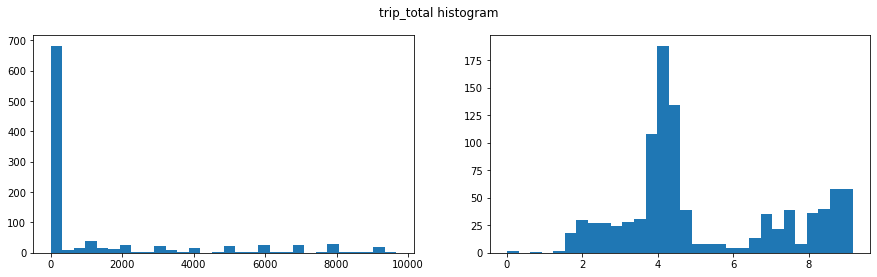

In [49]:
log_transform_hist(num_df['trip_seconds'],'trip_seconds histogram')
log_transform_hist(num_df['trip_miles'],'trip_miles histogram')
log_transform_hist(num_df['fare'],'fare histogram')
log_transform_hist(num_df['tips'],'tips histogram')
log_transform_hist(num_df['tolls'],'tolls histogram')
log_transform_hist(num_df['extras'],'extras histogram')
log_transform_hist(num_df['trip_total'],'trip_total histogram')

### Boxplot

In [50]:
def log_transform_bs (x, x_name):
        log_x = np.log(x+1)
        sns.boxplot(log_x).set(title = x_name)      

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


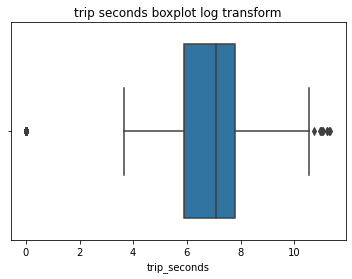

In [51]:
log_transform_bs(num_df['trip_seconds'],'trip seconds boxplot log transform')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


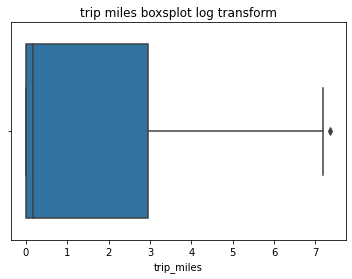

In [52]:
log_transform_bs(num_df['trip_miles'],'trip miles boxsplot log transform')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


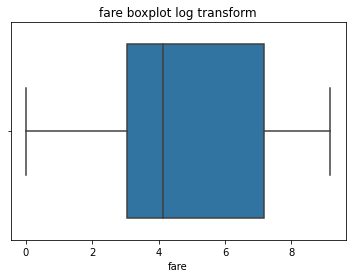

In [53]:
log_transform_bs(num_df['fare'],'fare boxplot log transform')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


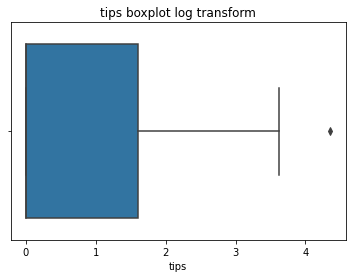

In [54]:
log_transform_bs(num_df['tips'],'tips boxplot log transform')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


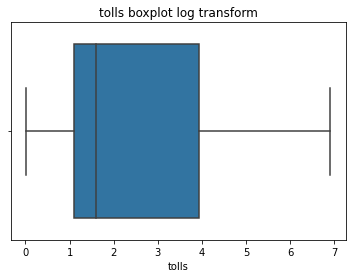

In [55]:
log_transform_bs(num_df['tolls'],'tolls boxplot log transform')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


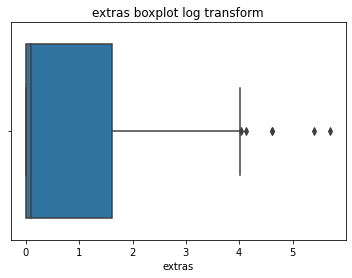

In [56]:
log_transform_bs(num_df['extras'],'extras boxplot log transform')

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


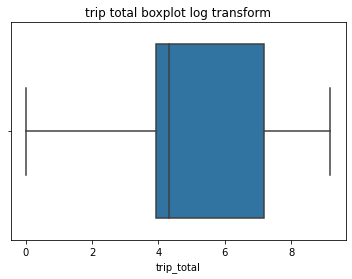

In [57]:
log_transform_bs(num_df['trip_total'],'trip total boxplot log transform')

### Construction of the logarithm dataframe

In [58]:
trip_seconds = 'trip_seconds'
trip_miles   = 'trip_miles'
fare         = 'fare'
tips         = 'tips'
tolls        = 'tolls'
extras       = 'extras'
trip_total   = 'trip_total'

In [59]:
log_trip_seconds = np.log(num_df[trip_seconds] + 1)
log_trip_miles   = np.log(num_df[trip_miles] + 1)
log_fare         = np.log(num_df[fare] + 1)
log_tips         = np.log(num_df[tips] + 1)
log_tolls        = np.log(num_df[tolls] + 1)
log_extras       = np.log(num_df[extras] + 1)
log_trip_total   = np.log(num_df[trip_total] + 1)

In [60]:
log_num_df = pd.DataFrame(
    columns = [trip_seconds,trip_miles,fare,tips,tolls,extras,trip_total]
)
log_num_df[trip_seconds] =log_trip_seconds
log_num_df[trip_miles] =log_trip_miles
log_num_df[fare] =log_fare
log_num_df[tips] =log_tips
log_num_df[tolls] =log_tolls
log_num_df[extras] =log_extras
log_num_df[trip_total] =log_trip_total

In [61]:
log_num_df.head()

,trip_seconds,trip_miles,fare,tips,tolls,extras,trip_total
0,7.705713,3.280911,4.143135,2.681022,0.916291,1.609438,4.414010
1,7.650169,3.306887,4.185860,2.397895,0.916291,1.609438,4.403666
2,6.660575,0.000000,7.170958,0.000000,3.258097,0.000000,7.189990
3,7.855932,3.356897,4.212128,0.000000,0.916291,3.713572,4.691348
4,6.928538,2.174752,3.135494,0.000000,1.064711,1.791759,3.397858


In [62]:
log_num_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   trip_seconds  1000 non-null   Float64
 1   trip_miles    1000 non-null   float64
 2   fare          1000 non-null   float64
 3   tips          1000 non-null   float64
 4   tolls         1000 non-null   float64
 5   extras        1000 non-null   float64
 6   trip_total    1000 non-null   float64
dtypes: Float64(1), float64(6)
memory usage: 55.8 KB


### Scatter matrix with the logarithm dataframe

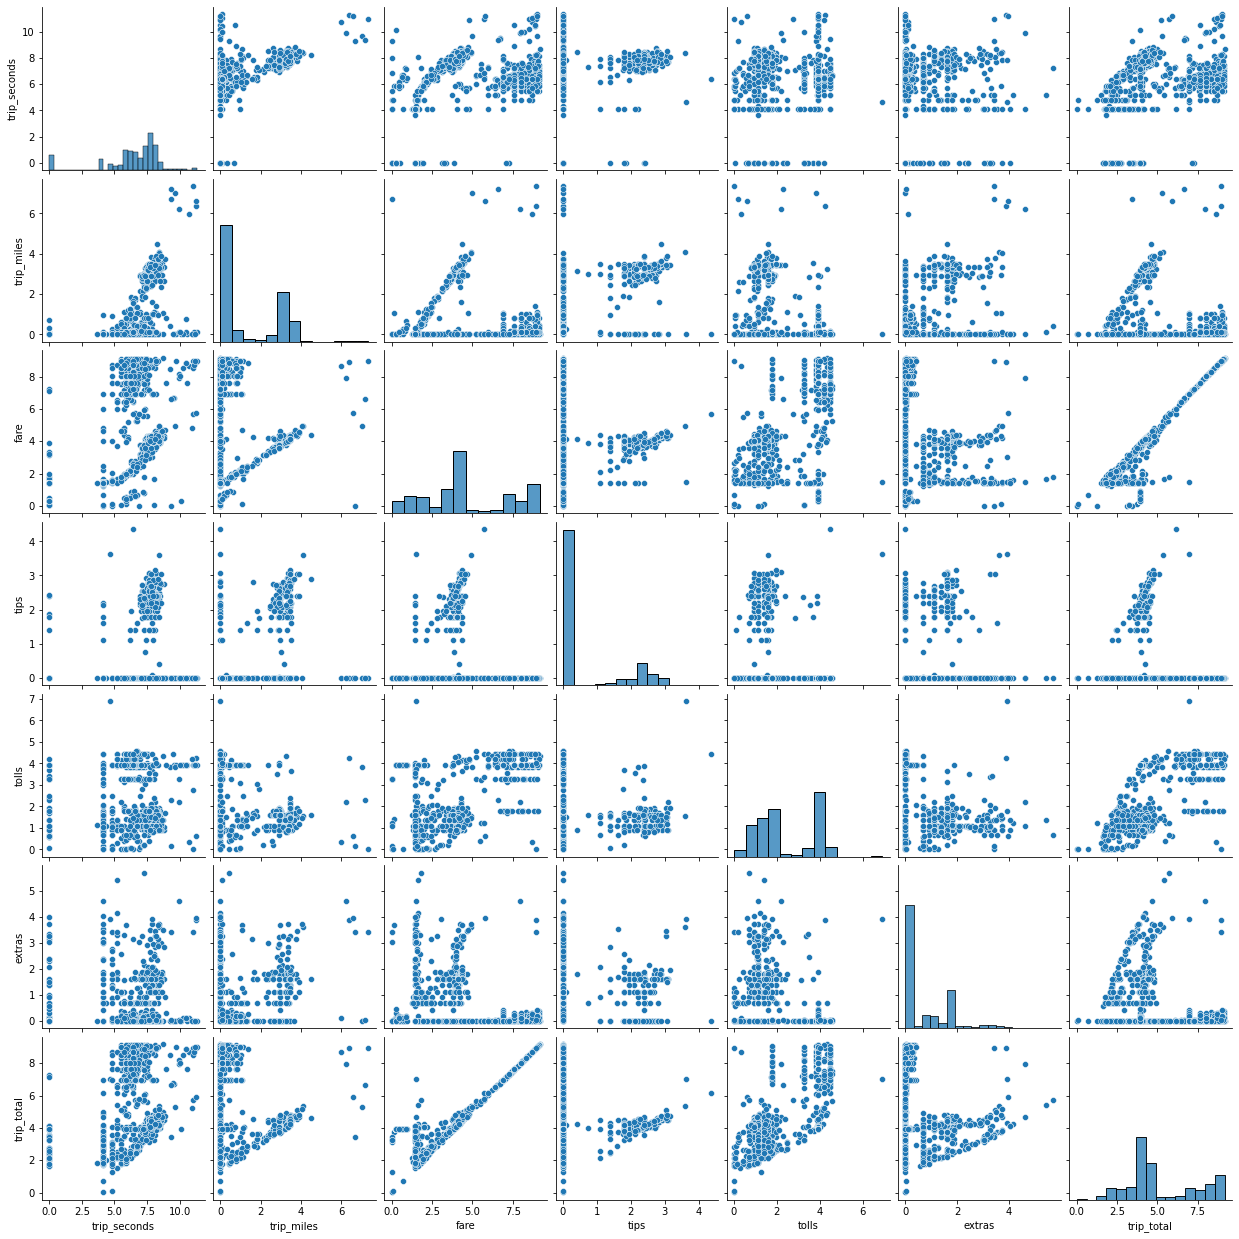

In [94]:
cols = ['trip_seconds','trip_miles','fare','tips','tolls','extras','trip_total']
sns.pairplot(data=log_num_df[cols])

### Heatmap with the logarithm dataframe

<AxesSubplot:>

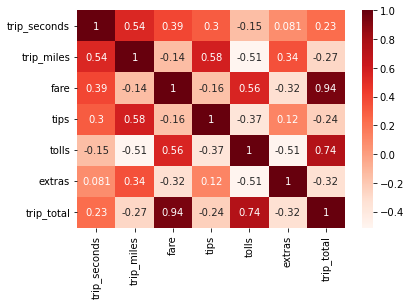

In [95]:
correlations = log_num_df[cols].corr()
sns.heatmap(correlations, cmap='Reds', annot=True)

## 4. Correlation study with MinMaxScatter and StandardScatter

In [67]:
def MinMaxScatter (a):
        x = a
        x_min = x.min()
        x_max = x.max()

        x_mean = x.mean()
        x_std = x.std()

        x_minmax_scaled = (x -x_min) / (x_max - x_min) #MinMax Scaler, recomendable cuando el rango de datos está acotado
        x_std_scaled = (x -x_mean) / x_std #Standard Scaler


        plt.hist(x_minmax_scaled, bins = 30, label='MinMax',  histtype='step', lw=3)
        plt.hist(x_std_scaled,    bins = 30, label='Standard',histtype='step', lw=3);

        plt.legend(title ='Scaling Method')

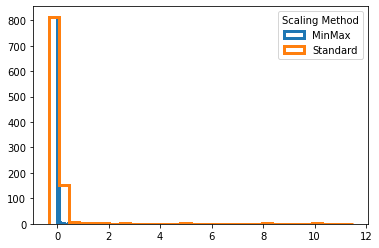

In [71]:
MinMaxScatter(num_df['trip_seconds'])

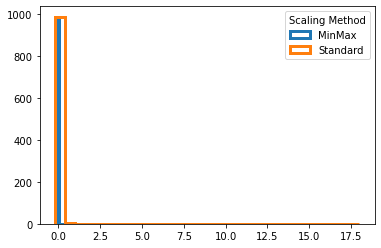

In [72]:
MinMaxScatter(num_df['trip_miles'])

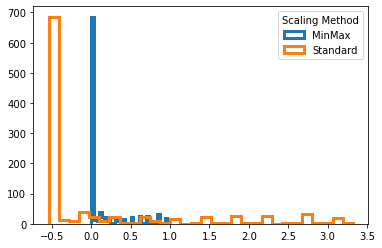

In [74]:
MinMaxScatter(num_df['fare'])

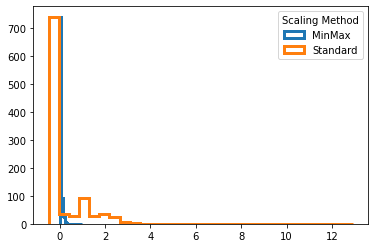

In [75]:
MinMaxScatter(num_df['tips'])

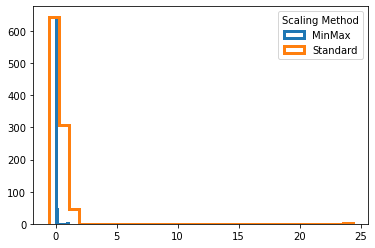

In [76]:
MinMaxScatter(num_df['tolls'])

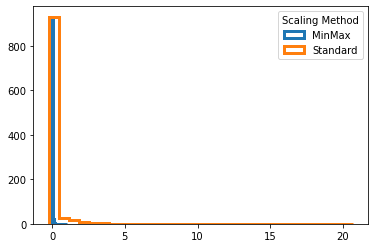

In [77]:
MinMaxScatter(num_df['extras'])

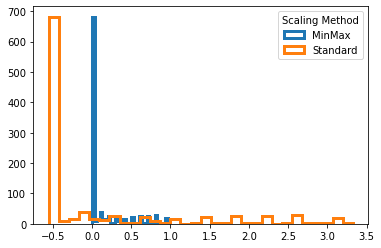

In [78]:
MinMaxScatter(num_df['trip_total'])

In [82]:
print(num_df['trip_seconds'].max())
print(num_df['trip_miles'].max())
print(num_df['fare'].max())
print(num_df['tips'].max())
print(num_df['tolls'].max())
print(num_df['extras'].max())
print(num_df['trip_total'].max())


84540
1567.2
9600.58
77.0
999.99
300.0
9675.59


In [83]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [96]:
minmax_scaler = MinMaxScaler().fit(num_df[cols])
data_min_max_scaled = minmax_scaler.transform(num_df[cols])

In [97]:
num_df[cols].values

array([[2220, 25.6, 62.0, ..., 1.5, 4.0, 81.6],
       [2100, 26.3, 64.75, ..., 1.5, 4.0, 80.75],
       [780, 0.0, 1300.09, ..., 25.0, 0.0, 1325.09],
       ...,
       [600, 0.1, 6000.78, ..., 50.0, 0.3, 6051.08],
       [4080, 1.6, 8003.94, ..., 50.0, 0.2, 8054.14],
       [3720, 0.1, 7600.41, ..., 55.0, 0.03, 7655.44]], dtype=object)

In [98]:
data_min_max_scaled

array([[2.62597587e-02, 1.63348647e-02, 6.45794317e-03, ...,
        1.49002980e-03, 1.33333333e-02, 8.43256942e-03],
       [2.48403123e-02, 1.67815212e-02, 6.74438419e-03, ...,
        1.49002980e-03, 1.33333333e-02, 8.34471939e-03],
       [9.22640170e-03, 0.00000000e+00, 1.35417860e-01, ...,
        2.49904998e-02, 0.00000000e+00, 1.36950963e-01],
       ...,
       [7.09723208e-03, 6.38080653e-05, 6.25043487e-01, ...,
        4.99909998e-02, 1.00000000e-03, 6.25396100e-01],
       [4.82611781e-02, 1.02092905e-03, 8.33693381e-01, ...,
        4.99909998e-02, 6.66666667e-04, 8.32418315e-01],
       [4.40028389e-02, 6.38080653e-05, 7.91661545e-01, ...,
        5.49910998e-02, 1.00000000e-04, 7.91211483e-01]])

In [99]:
num_df_minmax_scaled = pd.DataFrame(columns=num_df[cols].columns, data = data_min_max_scaled)
num_df_minmax_scaled.head()

,trip_seconds,trip_miles,fare,tips,tolls,extras,trip_total
0,0.026260,0.016335,0.006458,0.176623,0.00149,0.013333,0.008433
1,0.024840,0.016782,0.006744,0.129870,0.00149,0.013333,0.008345
2,0.009226,0.000000,0.135418,0.000000,0.02499,0.000000,0.136951
3,0.030518,0.017675,0.006927,0.000000,0.00149,0.133333,0.011161
4,0.012065,0.004977,0.002292,0.000000,0.00189,0.016667,0.002986


In [100]:
num_df_minmax_scaled.describe()

,trip_seconds,trip_miles,fare,tips,tolls,extras,trip_total
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.028490,0.010220,0.140525,0.036836,0.023370,0.011934,0.142518
std,0.084590,0.055057,0.258788,0.074533,0.040103,0.047747,0.257910
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.004258,0.000000,0.002064,0.000000,0.001990,0.000000,0.005200
50%,0.014194,0.000128,0.006442,0.000000,0.003990,0.000333,0.007736
75%,0.028389,0.011422,0.134631,0.051461,0.049991,0.013333,0.135962
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
